NAmes      326
CollgCr    188
OldTown    166
Sawyer     115
Gilbert    112
Edwards    112
Somerst    111
NWAmes      99
NridgHt     95
SawyerW     85
BrkSide     85
Mitchel     84
Crawfor     69
NoRidge     46
IDOTRR      43
Timber      42
StoneBr     38
SWISU       32
MeadowV     30
ClearCr     27
BrDale      21
Blmngtn     18
NPkVill     18
Veenker     15
Greens       7
Name: Neighborhood, dtype: int64
Index(['Unnamed: 0', 'Unnamed: 0.1', 'PID', 'GrLivArea', 'SalePrice',
       'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'MiscVal', 'MoSold',
       'YrSold', 'bathrm_cnt', 'patioSF', 'Prop_Addr', 'Full_Adr', 'gcode',
       'lat', 'long', 'dist', 'zip', 'tract', 'income', 'hood_Blmngtn',


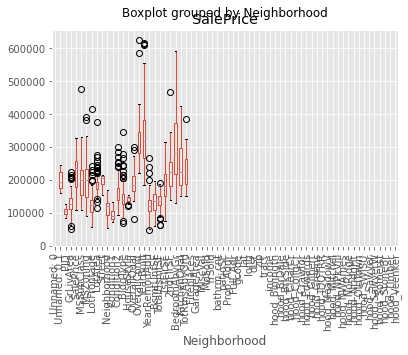

In [14]:
# Import clean data from module
from clean_data import *

In [15]:
# Import useful modules
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [16]:
# Check columns in clean data
X1.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'KitchenQual', 'Fireplaces', 'GarageArea', 'MiscVal', 'bathrm_cnt',
       'patioSF', 'dist', 'income', 'hood_Blmngtn', 'hood_BrDale',
       'hood_BrkSide', 'hood_ClearCr', 'hood_CollgCr', 'hood_Crawfor',
       'hood_Edwards', 'hood_Gilbert', 'hood_Greens', 'hood_IDOTRR',
       'hood_MeadowV', 'hood_Mitchel', 'hood_NPkVill', 'hood_NWAmes',
       'hood_NoRidge', 'hood_NridgHt', 'hood_OldTown', 'hood_SWISU',
       'hood_Sawyer', 'hood_SawyerW', 'hood_Somerst', 'hood_StoneBr',
       'hood_Timber', 'hood_Veenker', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'NearRR', 'NearPos', 'Artery', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_1.5Fin', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'Bsmt_ratio', 'Bedr_ratio', 'TotalBsmtSF',
       'bsmt_above_ratio'],
      dtype='object')

In [17]:
# Split clean data into a training and validation set
X1, X_test, Y, Y_test = train_test_split(X1, Y, test_size = 0.3)

In [18]:
# Scale the data 
scaler = StandardScaler().fit(X1)
features = scaler.transform(X1)
X1_std = pd.DataFrame(features, columns = X1.columns)

In [19]:
# Test a simple SVR model
svm_model = SVR()
test = svm_model.fit(X1_std, Y)

In [20]:
# Score of validation model
svm_model.score(X1_std, Y)

0.5024592321391382

In [21]:
# Check parameters in test SVR
test.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [9]:
# Run a randomized grid search (to avoid running every parameter combination)
params = {'C':np.linspace(1,100,20), 'gamma': ['auto', 'scale'], 
          'kernel': ['linear']}
rand = RandomizedSearchCV(svm_model, params, n_iter = 20, cv = 5, n_jobs = -1)
rand.fit(X1_std, Y)

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': array([  1.        ,   6.21052632,  11.42105263,  16.63157895,
        21.84210526,  27.05263158,  32.26315789,  37.47368421,
        42.68421053,  47.89473684,  53.10526316,  58.31578947,
        63.52631579,  68.73684211,  73.94736842,  79.15789474,
        84.36842105,  89.57894737,  94.78947368, 100.        ]),
                                        'gamma': ['auto', 'scale'],
                                        'kernel': ['linear']})

In [10]:
# Score from randomized grid search
rand.score(X1_std, Y)

0.6590437576426654

In [11]:
# Check the best score of the cross validation
rand.best_score_

0.6381461469038529

In [12]:
# Best parameters from randomized grid search
rand.best_params_

{'kernel': 'linear', 'gamma': 'scale', 'C': 6.2105263157894735}

In [13]:
# Calculate RMSE based on predictions
predictions = rand.predict(X1_std)
print(np.sqrt(mean_squared_error(predictions, Y)))

8.673160722909108


In [22]:
# Scale the validation data based on the scaler from the training data
features1 = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(features1, columns = X1_std.columns)

In [23]:
# Score and RSME of the validation data
predictions_test = rand.predict(X_test_scaled)
print(np.sqrt(mean_squared_error(predictions_test, Y_test)))
rand.score(X_test_scaled, Y_test)

NameError: name 'rand' is not defined

In [16]:
# View the coefficients from the random cross validation
rand.best_estimator_.coef_

array([[ 8.31270622e-01,  1.34618611e+00,  5.71265386e+00,
         1.79127469e+00,  9.70055236e-01,  1.33645978e+00,
         7.36201758e-01,  1.84998742e+00, -6.04005307e-03,
         1.13866165e+00,  6.65498305e-01,  1.56030049e+00,
        -5.58938228e-01, -1.64542548e-01,  9.84494415e-02,
         7.56863299e-01,  5.76765574e-01,  1.31327017e+00,
         1.44838841e+00, -1.93885585e-01,  1.15086529e+00,
         2.62379511e-01,  1.33828694e-01, -7.85130982e-01,
        -9.42236357e-02, -2.43928797e-01,  2.76731940e-02,
         2.04787142e+00,  2.94666864e+00, -4.51709118e-01,
        -2.48190112e-01,  4.79262298e-01,  1.78642449e-01,
         2.92820670e+00,  1.65455189e+00,  5.24348251e-01,
         1.00585268e+00, -2.19405538e-01,  5.19408189e-01,
        -9.39119378e-01, -1.83518585e-01,  6.03913133e-01,
        -4.19575969e-01, -5.15269160e-01, -7.98089192e-01,
        -3.16860250e-03,  3.04087817e-01, -1.33907398e+00,
        -2.78947345e+00,  7.63965407e-01,  3.19403075e-0

In [20]:
# Run a grid search on parameteres from random search
paramDict = {'C':[6.2105], 'gamma':['scale'], 'kernel':['linear']}
grid = GridSearchCV(svm_model, paramDict, cv=3, return_train_score = True)
grid.fit(X1_std, Y)

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [6.2105], 'gamma': ['scale'],
                         'kernel': ['linear']},
             return_train_score=True)

In [27]:
grid.best_params_

{'C': 6.2105, 'gamma': 'scale', 'kernel': 'linear'}

In [28]:
# View best score from cross validation and RMSE for training data
print(grid.best_score_)
predictions = grid.predict(X1_std)
np.sqrt(mean_squared_error(predictions, Y))

0.6250409803768312


8.922231574208555

In [67]:
# View best score from cross validation and RMSE for test data
print(grid.score(X_test_scaled, Y_test))
predictions2 = grid.predict(X_test_scaled)
np.sqrt(mean_squared_error(predictions2, Y_test))

0.6791732801438435


8.144923912775923

In [30]:
# View the coefficients from the grid search SVR model
grid.best_estimator_.coef_

array([[ 8.29556795e-01,  1.34630396e+00,  5.71183487e+00,
         1.79207450e+00,  9.69260532e-01,  1.33613491e+00,
         7.36898125e-01,  1.84901289e+00, -6.15324369e-03,
         1.13754063e+00,  6.66075181e-01,  1.55891803e+00,
        -5.59359084e-01, -1.63982590e-01,  9.83328810e-02,
         7.55865634e-01,  5.76230049e-01,  1.31241864e+00,
         1.44636884e+00, -1.94899883e-01,  1.15209416e+00,
         2.62356348e-01,  1.33933174e-01, -7.85419798e-01,
        -9.37102879e-02, -2.44215782e-01,  2.77269512e-02,
         2.04736612e+00,  2.94805657e+00, -4.52699536e-01,
        -2.49164525e-01,  4.78599330e-01,  1.79101970e-01,
         2.92903214e+00,  1.65528994e+00,  5.24380213e-01,
         1.00568884e+00, -2.19052071e-01,  5.20367267e-01,
        -9.38445020e-01, -1.84168829e-01,  6.04484853e-01,
        -4.20468544e-01, -5.14541818e-01, -7.98636565e-01,
        -3.73907133e-03,  3.03389409e-01, -1.33932319e+00,
        -2.78954361e+00,  7.64575209e-01,  3.18327081e-0

In [24]:
# View the intercept
grid.best_estimator_.intercept_

array([81.03354105])

In [4]:
# Import pickle so model data can be saved
import pickle

In [28]:
# Create pickle file of SVR model
filename = 'Pickle_SVR.pkl'
pickle.dump(grid, open(filename, 'wb'))

In [29]:
# Ceate pickle file of scaler transformation function
pickle.dump(scaler, open('scaler.pkl','wb'))

In [25]:
# Open same pickle file of SVR model
with open('Pickle_SVR.pkl', 'rb') as f:
    grid = pickle.load(f)

In [71]:
# Open same scaler file
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

In [26]:
grid.best_score_

0.6250409803768312

In [34]:
X_test_scaled.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'KitchenQual', 'Fireplaces', 'GarageArea', 'MiscVal', 'bathrm_cnt',
       'patioSF', 'dist', 'income', 'hood_Blmngtn', 'hood_BrDale',
       'hood_BrkSide', 'hood_ClearCr', 'hood_CollgCr', 'hood_Crawfor',
       'hood_Edwards', 'hood_Gilbert', 'hood_Greens', 'hood_IDOTRR',
       'hood_MeadowV', 'hood_Mitchel', 'hood_NPkVill', 'hood_NWAmes',
       'hood_NoRidge', 'hood_NridgHt', 'hood_OldTown', 'hood_SWISU',
       'hood_Sawyer', 'hood_SawyerW', 'hood_Somerst', 'hood_StoneBr',
       'hood_Timber', 'hood_Veenker', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'NearRR', 'NearPos', 'Artery', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_1.5Fin', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'Bsmt_ratio', 'Bedr_ratio', 'TotalBsmtSF',
       'bsmt_above_ratio'],
      dtype='object')

In [92]:
# Import final test data from module
from clean_data_test import *

In [97]:
print(X1_test.shape)
print(Y_test.shape)

(493, 55)
(493,)


In [102]:
# Create dictionary of target values to be compared with predicted
Y_test = pd.DataFrame(Y_test)

In [72]:
# Scale the test data based on the scaler from the training data
features_test = scaler.transform(X1_test)
X1_test_scaled = pd.DataFrame(features_test, columns = X1_test.columns)

In [73]:
# View the RMSE and score of the actual test data
print(grid.score(X1_test_scaled, Y_test))
predictions_test = grid.predict(X1_test_scaled)
np.sqrt(mean_squared_error(predictions_test, Y_test))

0.6428614479741682


8.569646800017848

In [100]:
# Create a dataframe of the predicted values
predict = pd.DataFrame(predictions_test.reshape(-1,1))

In [103]:
# View the predicted values
Y_test[['Predicted']] = predict

In [117]:
X1_test.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'KitchenQual', 'Fireplaces', 'GarageArea', 'MiscVal', 'bathrm_cnt',
       'patioSF', 'dist', 'income', 'hood_Blmngtn', 'hood_BrDale',
       'hood_BrkSide', 'hood_ClearCr', 'hood_CollgCr', 'hood_Crawfor',
       'hood_Edwards', 'hood_Gilbert', 'hood_Greens', 'hood_IDOTRR',
       'hood_MeadowV', 'hood_Mitchel', 'hood_NPkVill', 'hood_NWAmes',
       'hood_NoRidge', 'hood_NridgHt', 'hood_OldTown', 'hood_SWISU',
       'hood_Sawyer', 'hood_SawyerW', 'hood_Somerst', 'hood_StoneBr',
       'hood_Timber', 'hood_Veenker', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'NearRR', 'NearPos', 'Artery', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_1.5Fin', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'Bsmt_ratio', 'Bedr_ratio', 'TotalBsmtSF',
       'bsmt_above_ratio'],
      dtype='object')

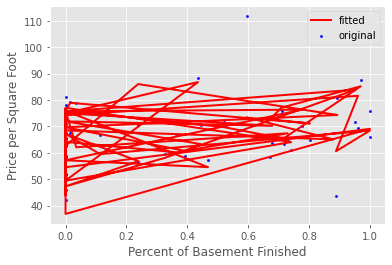

In [120]:
# View plot of predicted vs actual values
plt.scatter(X1_test['Bsmt_ratio'].iloc[0:50], Y_test['Price per SF'].iloc[0:50], s=5, color="blue", label="original")
plt.plot(X1_test['Bsmt_ratio'].iloc[0:50], Y_test['Predicted'].iloc[0:50], lw=2, color="red", label="fitted")
plt.legend()
plt.ylabel('Price per Square Foot')
plt.xlabel('Percent of Basement Finished')
plt.show()

In [145]:
# check feature importance
coefficients = pd.concat([pd.DataFrame(X1_test.columns),pd.DataFrame(np.transpose(grid.best_estimator_.coef_))], axis = 1)
coefficients.columns = ['Feature', 'Coefficient']
coefficients.sort_values('Coefficient', ascending=False)


,Feature,Coefficient
2,OverallQual,5.711835
28,hood_NridgHt,2.948057
33,hood_Somerst,2.929032
51,Bsmt_ratio,2.111215
27,hood_NoRidge,2.047366
7,GarageArea,1.849013
3,OverallCond,1.792075
34,hood_StoneBr,1.655290
11,dist,1.558918
18,hood_Crawfor,1.446369


In [146]:
coefficients['Importance'] = abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values('Importance', ascending=False)

In [147]:
coefficients['Importance'] = coefficients['Importance'].astype(float)
coefficients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 53 to 45
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Feature      55 non-null     object 
 1   Coefficient  55 non-null     float64
 2   Importance   55 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.7+ KB


In [193]:
coefficients

,Feature,Coefficient,Importance
53,TotalBsmtSF,-10.782204,10.782204
2,OverallQual,5.711835,5.711835
28,hood_NridgHt,2.948057,2.948057
33,hood_Somerst,2.929032,2.929032
48,HouseStyle_2Story,-2.789544,2.789544
51,Bsmt_ratio,2.111215,2.111215
27,hood_NoRidge,2.047366,2.047366
7,GarageArea,1.849013,1.849013
3,OverallCond,1.792075,1.792075
34,hood_StoneBr,1.655290,1.655290


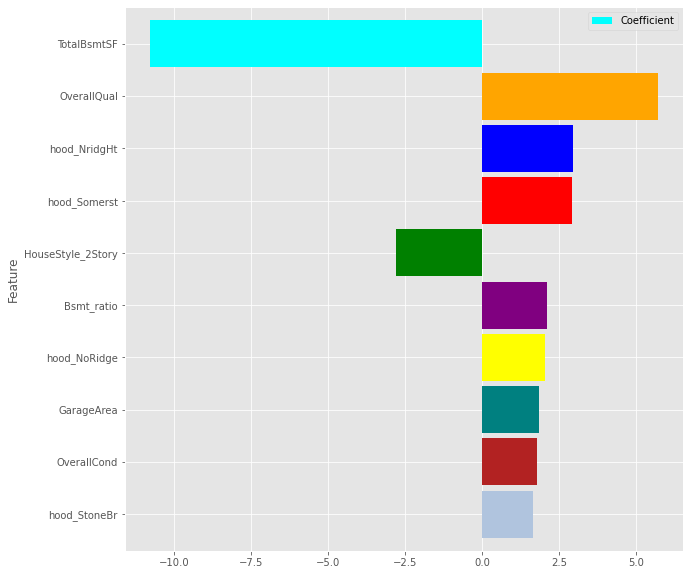

In [180]:
plot1 = coefficients.iloc[0:10].plot(kind='barh', x='Feature', y='Coefficient', 
                                     color=['cyan', 'orange', 'blue', 'red', 'green', 'purple', 'yellow', 
                                            'teal', 'firebrick', 'lightsteelblue'], 
                                     figsize=(10,10), width=.9).invert_yaxis()


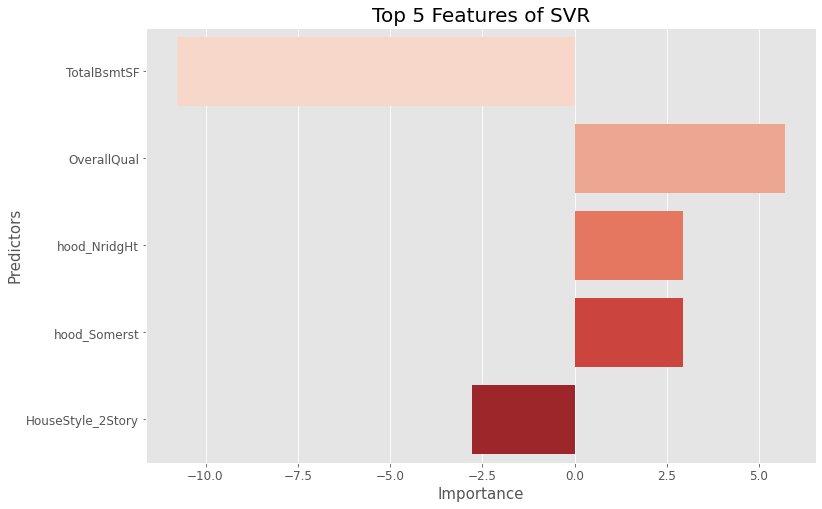

In [191]:
plt.figure(figsize=(12,8))
b = sns.barplot(y = coefficients.Feature.iloc[0:5], 
            x = coefficients.Coefficient.iloc[0:5],
           palette='Reds')
b.set_xlabel("Importance", fontsize=15)
b.set_ylabel("Predictors",fontsize = 15)
b.set_title("Top 5 Features of SVR", fontsize=20)
b.tick_params(labelsize = 12)

In [ ]:
14	hood_BrDale	0.098333	0.098333
24	hood_Mitchel	-0.093710	0.093710
26	hood_NWAmes	0.027727	0.027727
8	MiscVal	-0.006153	0.006153
45	BldgType_Twnhs

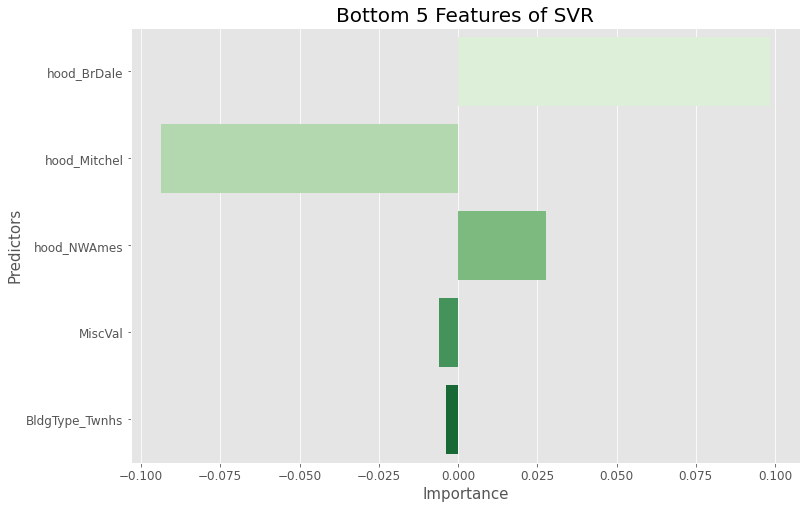

In [200]:
plt.figure(figsize=(12,8))
c = sns.barplot(y = coefficients.Feature.iloc[-5::], 
            x = coefficients.Coefficient.iloc[-5::],
           palette='Greens')
c.set_xlabel("Importance", fontsize=15)
c.set_ylabel("Predictors",fontsize = 15)
c.set_title("Bottom 5 Features of SVR", fontsize=20)
c.tick_params(labelsize = 12)

In [215]:
overall_qual_train = train[train['OverallQual']<=2][['OverallQual', 'SalePrice', 'TotalSF', 'LotArea']]

overall_qual_test = test[test['OverallQual']<=2][['OverallQual', 'SalePrice', 'TotalSF', 'LotArea']]

print(overall_qual_train)
print(overall_qual_test)

      OverallQual  SalePrice  TotalSF  LotArea
306             2      82000   1020.0     8154
627             2      63900    660.0     9000
729             2      46500    814.0     7311
1542            2      60000    728.0     8400
1611            1      61000   1587.0    10020
1659            2      59000   1015.0     5400
1746            2      60000   1064.0     6120
1772            2      68104    640.0    11067
     OverallQual  SalePrice  TotalSF  LotArea
120            2      12789   1510.0     9656
229            2      55000   1809.0    11340
308            2      35000    996.0     8088
338            1      39300    334.0     5000


In [240]:
cond_1 = train[train['OverallCond']==1][['TotalSF', 'SalePrice']]
cond_1['Price_per_sf'] = cond_1['SalePrice'] / cond_1['TotalSF']
print(cond_1.Price_per_sf.mean())
cond_2 = train[train['OverallCond']==2][['TotalSF', 'SalePrice']]
cond_2['Price_per_sf'] = cond_2['SalePrice'] / cond_2['TotalSF']
print(cond_2.Price_per_sf.mean())
cond_3 = train[train['OverallCond']==3][['TotalSF', 'SalePrice']]
cond_3['Price_per_sf'] = cond_3['SalePrice'] / cond_3['TotalSF']
print(cond_3.Price_per_sf.mean())
cond_4 = train[train['OverallCond']==4][['TotalSF', 'SalePrice']]
cond_4['Price_per_sf'] = cond_4['SalePrice'] / cond_4['TotalSF']
print(cond_4.Price_per_sf.mean())
cond_5 = train[train['OverallCond']==5][['TotalSF', 'SalePrice']]
cond_5['Price_per_sf'] = cond_5['SalePrice'] / cond_5['TotalSF']
print(cond_5.Price_per_sf.mean())
cond_6 = train[train['OverallCond']==6][['TotalSF', 'SalePrice']]
cond_6['Price_per_sf'] = cond_6['SalePrice'] / cond_6['TotalSF']
print(cond_6.Price_per_sf.mean())
cond_7 = train[train['OverallCond']==7][['TotalSF', 'SalePrice']]
cond_7['Price_per_sf'] = cond_7['SalePrice'] / cond_7['TotalSF']
print(cond_7.Price_per_sf.mean())
cond_8 = train[train['OverallCond']==8][['TotalSF', 'SalePrice']]
cond_8['Price_per_sf'] = cond_8['SalePrice'] / cond_8['TotalSF']
print(cond_8.Price_per_sf.mean())
cond_9 = train[train['OverallCond']==9][['TotalSF', 'SalePrice']]
cond_9['Price_per_sf'] = cond_9['SalePrice'] / cond_9['TotalSF']
print(cond_9.Price_per_sf.mean())
cond_10 = train[train['OverallCond']==10][['TotalSF', 'SalePrice']]
cond_10['Price_per_sf'] = cond_10['SalePrice'] / cond_10['TotalSF']
print(cond_10.Price_per_sf.mean())


diff1=cond_2.Price_per_sf.mean()-cond_1.Price_per_sf.mean()
diff2=cond_3.Price_per_sf.mean()-cond_2.Price_per_sf.mean()
diff3=cond_4.Price_per_sf.mean()-cond_3.Price_per_sf.mean()
diff4=cond_5.Price_per_sf.mean()-cond_4.Price_per_sf.mean()
diff5=cond_6.Price_per_sf.mean()-cond_5.Price_per_sf.mean()
diff6=cond_7.Price_per_sf.mean()-cond_6.Price_per_sf.mean()
diff7=cond_8.Price_per_sf.mean()-cond_7.Price_per_sf.mean()
diff8=cond_9.Price_per_sf.mean()-cond_8.Price_per_sf.mean()

(diff1+diff2+diff3+diff4+diff5+diff6+diff7+diff8)/8

38.43730308758664
50.820388057624676
50.54132020656272
53.573803015323506
73.57161882569831
66.28262668712638
69.82636730332511
71.04709731761997
77.6951989452413
nan


4.9072369822068325